## Decision Tree

### Problem Statement:
#### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
#### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & 
#### all other variable will be independent in the analysis.  


In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [62]:
df_company = pd.read_csv('Company_Data.csv')
df_company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [63]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [64]:
df_company.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [65]:
# Converting Sales feature into categorical type

sales_category = pd.cut(df_company.Sales, bins=[0, 5.39, 9.32, 16.27], labels=['low', 'moderate', 'high'])
df_company.insert(0, 'Sales_category', sales_category)
df_company.drop(['Sales'], axis=1, inplace=True)

In [66]:
df_company.head()

,Sales_category,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,moderate,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No


In [67]:
df_company['ShelveLoc'], class_names = pd.factorize(df_company['ShelveLoc'])
df_company.ShelveLoc

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [68]:
df_company['Urban'], class_names2 = pd.factorize(df_company['Urban'])
df_company.Urban

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    1
397    0
398    0
399    0
Name: Urban, Length: 400, dtype: int64

In [69]:
df_company['US'].replace(to_replace=['Yes', 'No'], value=['0', '1'], inplace=True)
df_company.US

0      0
1      0
2      0
3      0
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: US, Length: 400, dtype: object

In [70]:
df_company

,Sales_category,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,0,42,17,0,0
1,high,111,48,16,260,83,1,65,10,0,0
2,high,113,35,10,269,80,2,59,12,0,0
3,moderate,117,100,4,466,97,2,55,14,0,0
4,low,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,1,33,14,0,0
396,moderate,139,23,3,37,120,2,55,11,1,0
397,moderate,162,26,12,368,159,2,40,18,0,0
398,moderate,100,79,7,284,95,0,50,12,0,0


In [71]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sales_category  399 non-null    category
 1   CompPrice       400 non-null    int64   
 2   Income          400 non-null    int64   
 3   Advertising     400 non-null    int64   
 4   Population      400 non-null    int64   
 5   Price           400 non-null    int64   
 6   ShelveLoc       400 non-null    int64   
 7   Age             400 non-null    int64   
 8   Education       400 non-null    int64   
 9   Urban           400 non-null    int64   
 10  US              400 non-null    object  
dtypes: category(1), int64(9), object(1)
memory usage: 31.9+ KB


In [72]:
df_company.isna().sum()

Sales_category    1
CompPrice         0
Income            0
Advertising       0
Population        0
Price             0
ShelveLoc         0
Age               0
Education         0
Urban             0
US                0
dtype: int64

In [73]:
df_company.dropna(inplace=True)
df_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sales_category  399 non-null    category
 1   CompPrice       399 non-null    int64   
 2   Income          399 non-null    int64   
 3   Advertising     399 non-null    int64   
 4   Population      399 non-null    int64   
 5   Price           399 non-null    int64   
 6   ShelveLoc       399 non-null    int64   
 7   Age             399 non-null    int64   
 8   Education       399 non-null    int64   
 9   Urban           399 non-null    int64   
 10  US              399 non-null    object  
dtypes: category(1), int64(9), object(1)
memory usage: 34.8+ KB


#### Outlier detection using isoation forest

In [74]:
from sklearn.ensemble import IsolationForest

In [75]:
df_copy = df_company.copy()
data_encoded = pd.get_dummies(df_copy)

In [76]:
# training the model

clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data_encoded)

IsolationForest(contamination=0.01, random_state=10)

In [77]:
# predictions

y_pred_outliers = clf.predict(data_encoded)

In [78]:
data_encoded

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Sales_category_low,Sales_category_moderate,Sales_category_high,US_0,US_1
0,138,73,11,276,120,0,42,17,0,0,0,1,1,0
1,111,48,16,260,83,1,65,10,0,0,0,1,1,0
2,113,35,10,269,80,2,59,12,0,0,0,1,1,0
3,117,100,4,466,97,2,55,14,0,0,1,0,1,0
4,141,64,3,340,128,0,38,13,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0,0,1,1,0
396,139,23,3,37,120,2,55,11,1,0,1,0,1,0
397,162,26,12,368,159,2,40,18,0,0,1,0,1,0
398,100,79,7,284,95,0,50,12,0,0,1,0,1,0


In [79]:
data_encoded['scores'] = clf.decision_function(data_encoded)
data_encoded['anomaly'] = clf.predict(data_encoded.iloc[:, 0:14])
data_encoded

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Sales_category_low,Sales_category_moderate,Sales_category_high,US_0,US_1,scores,anomaly
0,138,73,11,276,120,0,42,17,0,0,0,1,1,0,0.095616,1
1,111,48,16,260,83,1,65,10,0,0,0,1,1,0,0.086739,1
2,113,35,10,269,80,2,59,12,0,0,0,1,1,0,0.110598,1
3,117,100,4,466,97,2,55,14,0,0,1,0,1,0,0.134853,1
4,141,64,3,340,128,0,38,13,0,1,0,0,0,1,0.074690,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0,0,1,1,0,0.102631,1
396,139,23,3,37,120,2,55,11,1,0,1,0,1,0,0.080479,1
397,162,26,12,368,159,2,40,18,0,0,1,0,1,0,0.070422,1
398,100,79,7,284,95,0,50,12,0,0,1,0,1,0,0.115920,1


In [80]:
# Print the outlier data points

data_encoded[data_encoded['anomaly']==-1]

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,Sales_category_low,Sales_category_moderate,Sales_category_high,US_0,US_1,scores,anomaly
42,77,69,0,25,24,2,50,18,0,0,0,1,0,1,-0.036655,-1
75,88,111,23,480,92,0,36,16,1,0,1,0,1,0,-0.002801,-1
229,98,104,0,404,72,2,27,18,1,0,0,1,0,1,-0.016184,-1
367,95,106,0,256,53,1,52,17,0,0,0,1,0,1,-0.010730,-1


In [81]:
df_company.drop([45, 75, 229, 367], inplace=True)
df_company

,Sales_category,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,0,42,17,0,0
1,high,111,48,16,260,83,1,65,10,0,0
2,high,113,35,10,269,80,2,59,12,0,0
3,moderate,117,100,4,466,97,2,55,14,0,0
4,low,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,1,33,14,0,0
396,moderate,139,23,3,37,120,2,55,11,1,0
397,moderate,162,26,12,368,159,2,40,18,0,0
398,moderate,100,79,7,284,95,0,50,12,0,0


#### Buid decision tree classifier using entropy criteria

In [82]:
x = df_company.iloc[:, 1:]
y = df_company['Sales_category']
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,0,0
1,111,48,16,260,83,1,65,10,0,0
2,113,35,10,269,80,2,59,12,0,0
3,117,100,4,466,97,2,55,14,0,0
4,141,64,3,340,128,0,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0
396,139,23,3,37,120,2,55,11,1,0
397,162,26,12,368,159,2,40,18,0,0
398,100,79,7,284,95,0,50,12,0,0


In [83]:
y

0          high
1          high
2          high
3      moderate
4           low
         ...   
395        high
396    moderate
397    moderate
398    moderate
399        high
Name: Sales_category, Length: 395, dtype: category
Categories (3, object): ['low' < 'moderate' < 'high']

In [85]:
df_company['Sales_category'].unique()

['high', 'moderate', 'low']
Categories (3, object): ['low' < 'moderate' < 'high']

In [86]:
df_company.Sales_category.value_counts()

moderate    200
low          98
high         97
Name: Sales_category, dtype: int64

In [87]:
# Splitting data into training and testing data set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [88]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [89]:
df_company.columns

Index(['Sales_category', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

[Text(404.72222222222223, 815.4, 'ShelveLoc <= 0.5\nentropy = 1.503\nsamples = 316\nvalue = [81, 78, 157]\nclass = high'),
 Text(155.0, 634.2, 'Price <= 89.5\nentropy = 1.272\nsamples = 74\nvalue = [5, 40, 29]\nclass = moderate'),
 Text(68.88888888888889, 453.0, 'CompPrice <= 123.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 0, 8]\nclass = high'),
 Text(34.44444444444444, 271.80000000000007, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 8]\nclass = high'),
 Text(103.33333333333333, 271.80000000000007, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = low'),
 Text(241.1111111111111, 453.0, 'CompPrice <= 144.0\nentropy = 1.102\nsamples = 63\nvalue = [2, 40, 21]\nclass = moderate'),
 Text(172.22222222222223, 271.80000000000007, 'Price <= 105.0\nentropy = 0.975\nsamples = 57\nvalue = [1, 40, 16]\nclass = moderate'),
 Text(137.77777777777777, 90.60000000000002, 'entropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]\nclass = high'),
 Text(206.66666666666666, 90.60000000000002, 'entropy = 0.7

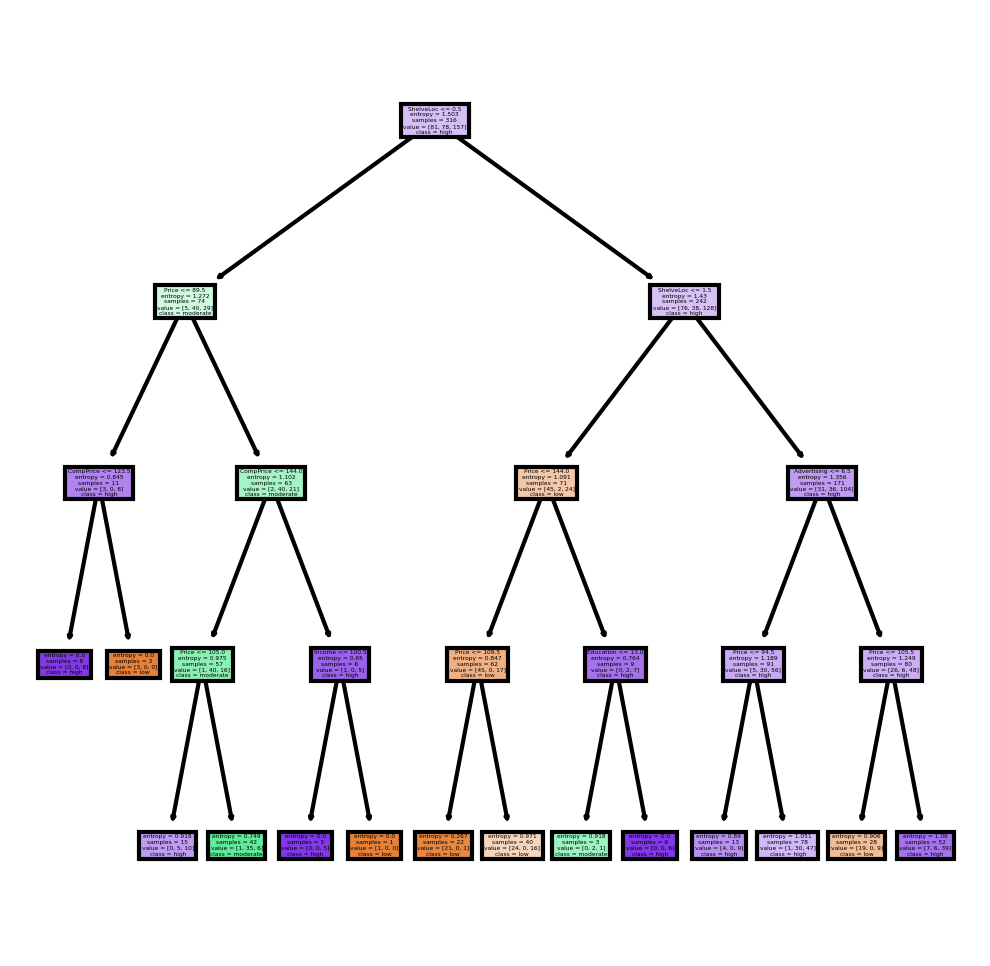

In [90]:
# Plot the tree

fn = ['CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn = ['low', 'moderate', 'high']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [91]:
# Predicting on test data

preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

moderate    52
high        16
low         11
dtype: int64

In [92]:
preds

array(['high', 'moderate', 'moderate', 'moderate', 'moderate', 'high',
       'moderate', 'low', 'moderate', 'moderate', 'moderate', 'moderate',
       'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'low',
       'high', 'high', 'low', 'moderate', 'moderate', 'moderate', 'high',
       'high', 'moderate', 'moderate', 'moderate', 'high', 'moderate',
       'moderate', 'low', 'moderate', 'moderate', 'moderate', 'moderate',
       'moderate', 'moderate', 'moderate', 'moderate', 'low', 'moderate',
       'moderate', 'moderate', 'low', 'moderate', 'high', 'moderate',
       'moderate', 'moderate', 'moderate', 'high', 'moderate', 'moderate',
       'low', 'moderate', 'low', 'low', 'moderate', 'high', 'moderate',
       'high', 'high', 'moderate', 'high', 'moderate', 'moderate',
       'moderate', 'high', 'moderate', 'low', 'moderate', 'low', 'high',
       'moderate', 'high', 'moderate', 'moderate'], dtype=object)

In [93]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,high,low,moderate
Sales_category,,,
low,0,6,14
moderate,8,5,30
high,8,0,8


In [94]:
# Accuracy

np.mean(preds==y_test)

0.5569620253164557

#### Decision tree classifier CART using Gini criteria

In [95]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [96]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [97]:
# Prediction and computing the accuracy

pred = model_gini.predict(x_test)
np.mean(pred==y_test)

0.4936708860759494

[Text(456.6964285714286, 815.4, 'ShelveLoc <= 0.5\ngini = 0.627\nsamples = 316\nvalue = [81, 78, 157]\nclass = high'),
 Text(249.10714285714286, 634.2, 'Price <= 105.0\ngini = 0.55\nsamples = 74\nvalue = [5, 40, 29]\nclass = moderate'),
 Text(132.85714285714286, 453.0, 'CompPrice <= 123.5\ngini = 0.47\nsamples = 26\nvalue = [3, 5, 18]\nclass = high'),
 Text(66.42857142857143, 271.80000000000007, 'Population <= 305.0\ngini = 0.363\nsamples = 21\nvalue = [0, 5, 16]\nclass = high'),
 Text(33.214285714285715, 90.60000000000002, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10]\nclass = high'),
 Text(99.64285714285714, 90.60000000000002, 'gini = 0.496\nsamples = 11\nvalue = [0, 5, 6]\nclass = high'),
 Text(199.28571428571428, 271.80000000000007, 'Advertising <= 9.0\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 2]\nclass = low'),
 Text(166.07142857142858, 90.60000000000002, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = high'),
 Text(232.5, 90.60000000000002, 'gini = 0.0\nsamples = 3\nvalue = 

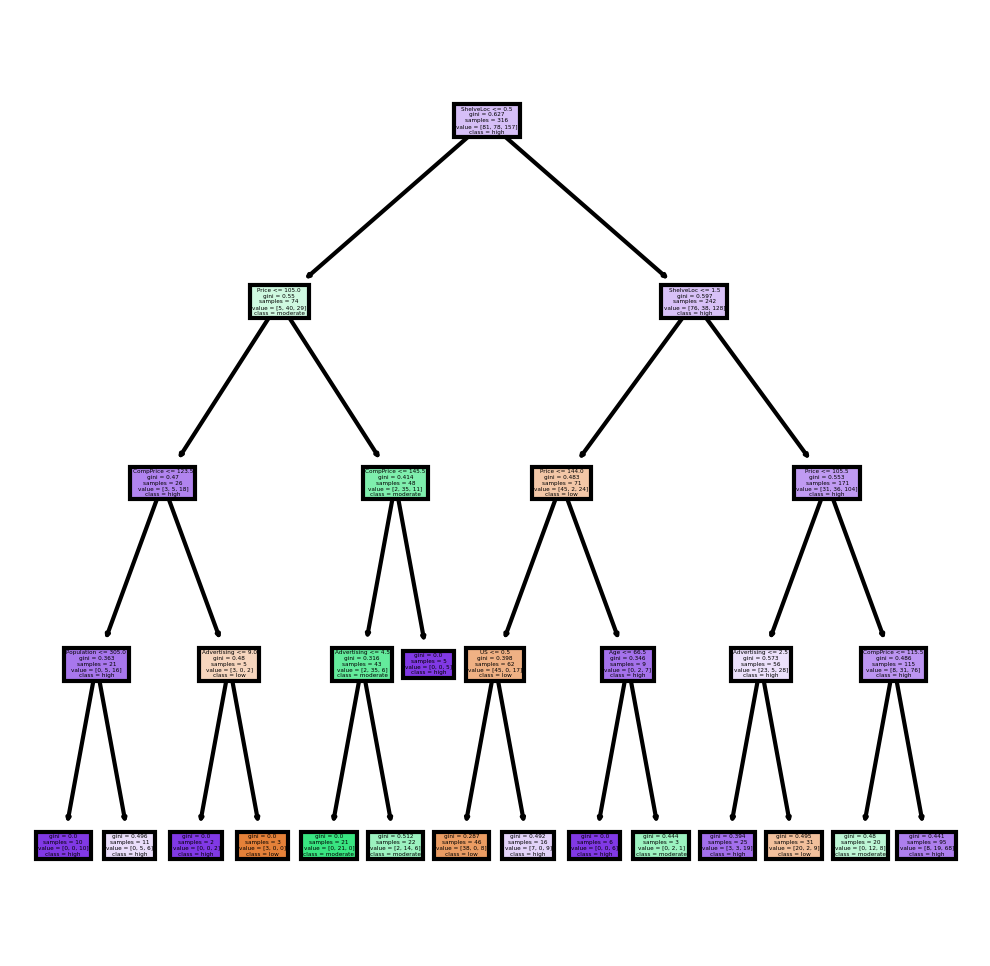

In [98]:
# Plot the tree, by CART

fn = ['CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn = ['low', 'moderate', 'high']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True)